RNN based - Stock predicition

In [ ]:
import math
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
from sklearn.model_selection import train_test_split
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
ticker = 'AMZN'  #amazon  start=   end = current date

In [ ]:
ticker = 'TSLA'  #Tesla start=   end = current date

In [ ]:
#Get stock quote - we import just the opening and closing Prices of stock, over 20 years duration

#df=web.DataReader('AAPL', 'yahoo', start='2015-01-01', end='2020-05-24')    #YYYY-MM-DD
yf.pdr_override()
df=pdr.get_data_yahoo(ticker, start='2015-01-01', end='2022-12-24')
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   14.858000   14.883333   14.217333   14.620667   14.620667   
2015-01-05   14.303333   14.433333   13.810667   14.006000   14.006000   
2015-01-06   14.004000   14.280000   13.614000   14.085333   14.085333   
2015-01-07   14.223333   14.318667   13.985333   14.063333   14.063333   
2015-01-08   14.187333   14.253333   14.000667   14.041333   14.041333   
...                ...         ...         ...         ...         ...   
2022-12-19  154.000000  155.250000  145.820007  149.869995  149.869995   
2022-12-20  146.050003  148.470001  137.660004  137.800003  137.800003   
2022-12-21  139.339996  141.259995  135.889999  137.570007  137.570007   
2022-12-22  136.000000  136.630005  122.260002  125.349998  125.349998   
2022-12-23  126.370003  128.619995  121.019

In [ ]:
df.shape

(2010, 6)

In [ ]:
plt.style.use('seaborn')

<ipython-input-108-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


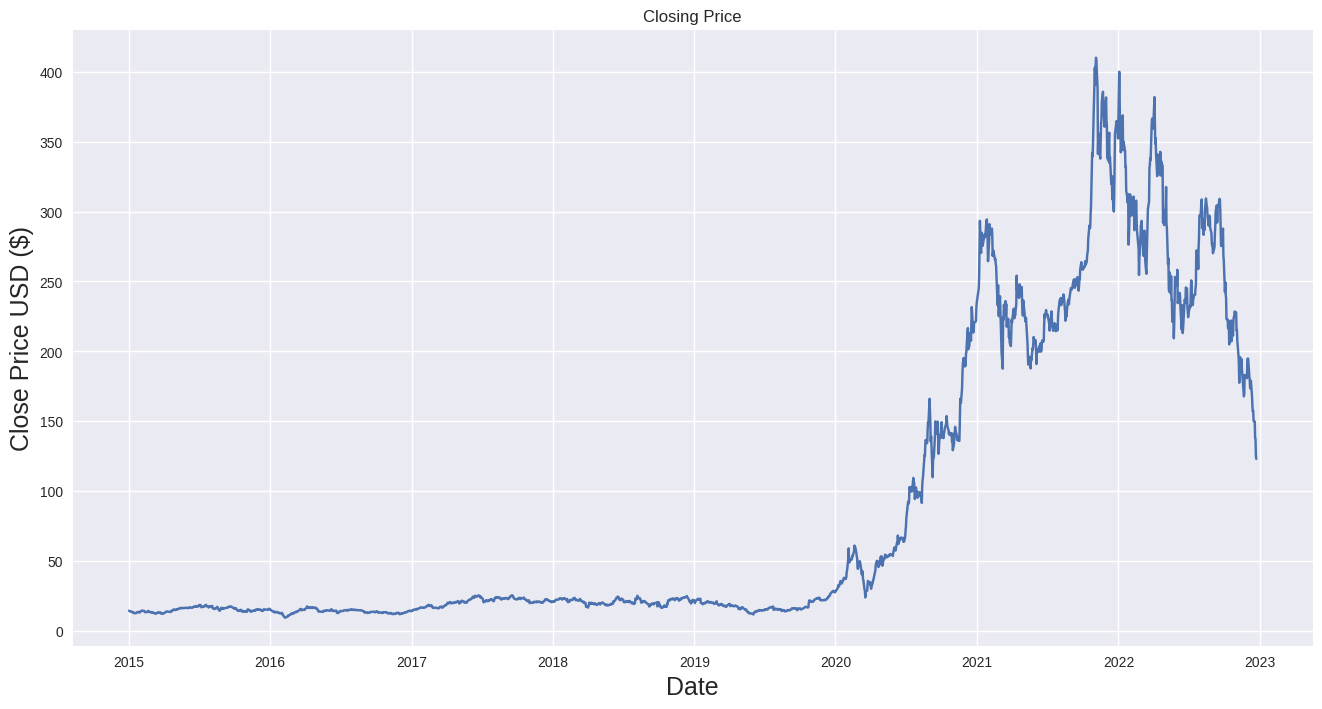

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1608

In [ ]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(200, len(train_data)):
    x_train.append(train_data[i-200:i,0])
    y_train.append(train_data[i,0])
    if i<=200:
        print(x_train)
        print(y_train)
        print()

[array([0.01259433, 0.01105916, 0.0112573 , 0.01120235, 0.01114741,
       0.01048805, 0.00974712, 0.01008678, 0.008162  , 0.00802547,
       0.00822527, 0.00803546, 0.00880803, 0.00964888, 0.00959393,
       0.01046974, 0.01037483, 0.00927424, 0.01024496, 0.00997855,
       0.01120069, 0.01243614, 0.01246778, 0.01287405, 0.01226964,
       0.01228962, 0.01209148, 0.01151039, 0.00985867, 0.01000686,
       0.01010343, 0.01012175, 0.0113289 , 0.01222802, 0.01060128,
       0.01006347, 0.01000519, 0.0105763 , 0.00993526, 0.00893458,
       0.00930588, 0.00978541, 0.00948404, 0.00836014, 0.00786063,
       0.00776739, 0.00833683, 0.00789227, 0.00749432, 0.00866318,
       0.00850167, 0.00949736, 0.00865485, 0.00905945, 0.00931754,
       0.00966553, 0.00843007, 0.00778237, 0.00688159, 0.00780901,
       0.00750931, 0.00731283, 0.00788061, 0.0098953 , 0.00992028,
       0.01065623, 0.01105916, 0.01119403, 0.01100755, 0.01062126,
       0.01068286, 0.01049471, 0.0105097 , 0.01025661, 0.0109

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1408, 200, 1)

In [ ]:
#Build model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/30
15/15 [==============================] - 5s 327ms/step - loss: 5.6058e-04
Epoch 2/30
15/15 [==============================] - 4s 253ms/step - loss: 3.9306e-04
Epoch 3/30
15/15 [==============================] - 4s 241ms/step - loss: 3.3954e-04
Epoch 4/30
15/15 [==============================] - 5s 302ms/step - loss: 3.5952e-04
Epoch 5/30
15/15 [==============================] - 4s 243ms/step - loss: 2.9745e-04
Epoch 6/30
15/15 [==============================] - 4s 265ms/step - loss: 3.5842e-04
Epoch 7/30
15/15 [==============================] - 5s 307ms/step - loss: 2.7705e-04
Epoch 8/30
15/15 [==============================] - 4s 244ms/step - loss: 2.8214e-04
Epoch 9/30
15/15 [==============================] - 5s 332ms/step - loss: 2.3791e-04
Epoch 10/30
15/15 [==============================] - 5s 312ms/step - loss: 3.7306e-04
Epoch 11/30
15/15 [==============================] - 4s 253ms/step - loss: 2.6567e-04
Epoch 12/30
15/15 [==============================] - 4s 258ms/s

Test and Validating model

In [ ]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-200: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(200, len(test_data)):
    x_test.append(test_data[i-200:i,0])

In [ ]:
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [ ]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

13/13 [==============================] - 1s 45ms/step


In [ ]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse

6.781195835094547

In [ ]:
def MAPE(Original, Expectation):
  n = float(0)
  for i in range(0, len(Original)):
    n += abs((Original[i]- Expectation[i])/ (Original[i])) * 100
  n /= len(Original)
  return n

mape = MAPE(y_test,predictions)
print(mape)

[5.18796546]


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(r2)

0.8729001611217326


In [ ]:
plt.style.use('seaborn')

<ipython-input-125-4a43041a1d49>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<ipython-input-126-64fb3586ec1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


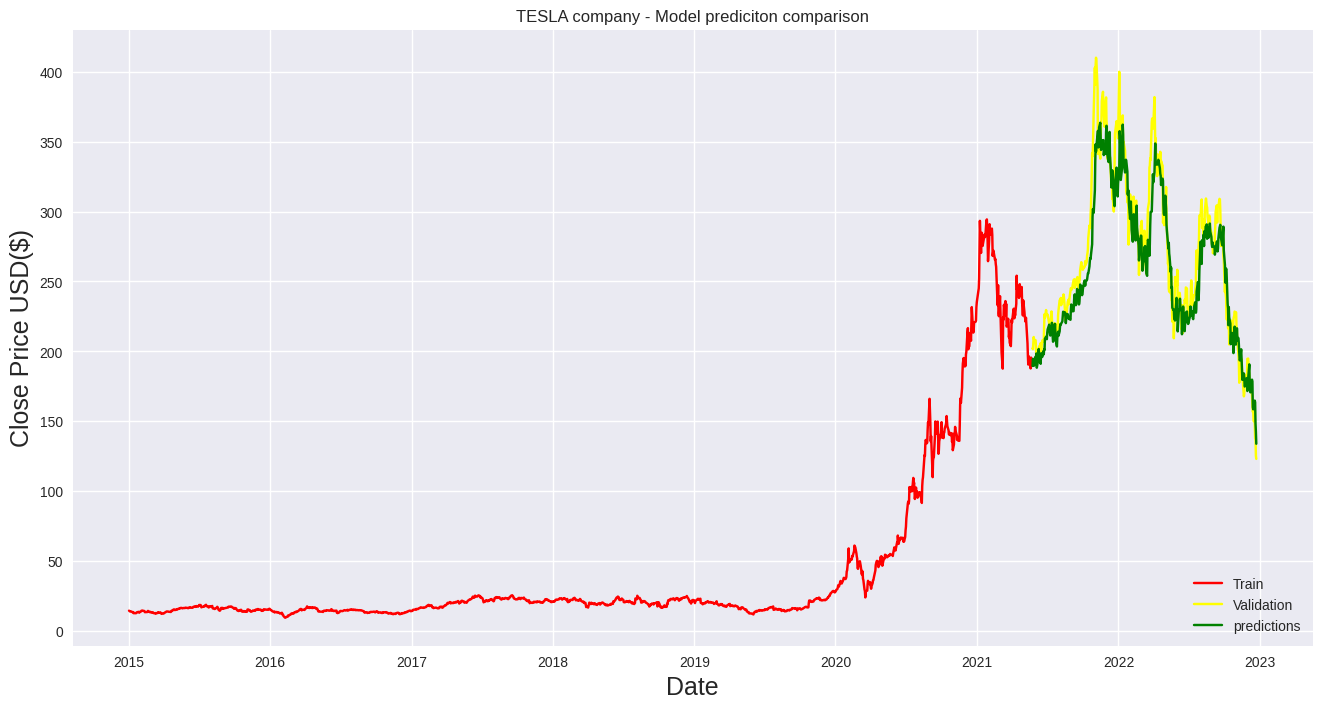

In [ ]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('TESLA company - Model prediciton comparison')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'] , color='red')
plt.plot(valid['Close'] , color='yellow')
plt.plot(valid[ 'predictions'] , color='green')
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
#plt.savefig('/content/prediction.png')
plt.show()

In [ ]:
valid.tail(15)

,Close,predictions
Date,,
2022-12-05,91.010002,91.454849
2022-12-06,88.250000,87.904968
2022-12-07,88.459999,85.613342
2022-12-08,90.349998,85.561272
2022-12-09,89.089996,89.436562
2022-12-12,90.550003,85.435890
2022-12-13,92.489998,86.516342
2022-12-14,91.580002,90.140541
2022-12-15,88.449997,89.317009
